By  Ratan Kumar




In [ ]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
df=pd.read_csv('train.csv')
df.head()

,Id,Category,Tweet
0,6.357700e+17,negative,Not Available
1,6.359300e+17,neutral,IOS 9 App Transport Security. Mm need to check...
2,6.359500e+17,neutral,"Mar if you have an iOS device, you should down..."
3,6.360310e+17,negative,@jimmie_vanagon my phone does not run on lates...
4,6.361010e+17,positive,Not sure how to start your publication on iOS?...


<AxesSubplot:xlabel='Category', ylabel='count'>

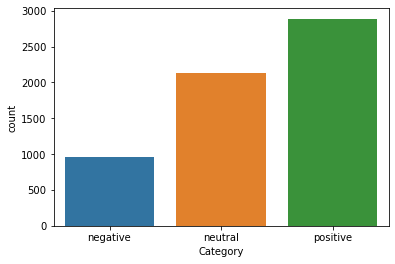

In [ ]:
sns.countplot(x='Category',data=df)

In [ ]:
df.shape

(5969, 3)

## Data Cleaning 

In [ ]:
df = df[df['Tweet'] != "Not Available"]

In [ ]:
def clean_tweets(tweet):
    
    # remove URL
    tweet = re.sub(r"http\S+", "", tweet)
    
    # Remove usernames
    tweet = re.sub(r"@[^\s]+[\s]?",'',tweet)
    
    # remove special characters 
    tweet = re.sub('[^ a-zA-Z0-9]', '', tweet)
    
    # remove Numbers
    tweet = re.sub('[0-9]', '', tweet)
    
    return tweet

In [ ]:
df['Tweet'] = df['Tweet'].apply(clean_tweets)

In [ ]:
df

,Id,Category,Tweet
1,6.359300e+17,neutral,IOS App Transport Security Mm need to check i...
2,6.359500e+17,neutral,Mar if you have an iOS device you should downl...
3,6.360310e+17,negative,my phone does not run on latest IOS which may ...
4,6.361010e+17,positive,Not sure how to start your publication on iOS ...
5,6.361760e+17,neutral,Two Dollar Tuesday is here with Forklift Quic...
...,...,...,...
5962,6.384460e+17,positive,Ok ed lets do this Zlatan greizmann and Laport...
5963,6.385320e+17,neutral,Goal level Zlatan k by Friday Posting every ...
5964,6.390170e+17,neutral,Wouldnt surprise me if we enquiredHe cant be ...
5965,6.402770e+17,neutral,Rib injury for Zlatan against Russia is a big ...


## Preprocessing text data

In [ ]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
ps = PorterStemmer()
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /Users/ratan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/ratan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/ratan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
def tokenize(text):
    return word_tokenize(text)

def stword(words):
    stword=[]
    for w in words:
      if not w in stopwords.words('english'):
        stword.append(w)
    return stword         

def stemming(words):
    stem_words = []
    for w in words:
        w = ps.stem(w)
        stem_words.append(w)
    
    return stem_words

def word_lemitizer(words):
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in words])
    
    return lemmatized_output

In [ ]:
df['text'] = df['Tweet'].apply(tokenize)

In [ ]:
df['stwordremoved']=df['text'].apply(stword)

In [ ]:
df['tokenized'] = df['stwordremoved'].apply(stemming)

In [ ]:
df['cleaned_text']=df['tokenized'].apply(word_lemitizer)

In [ ]:
df

,Id,Category,Tweet,text,stwordremoved,tokenized,cleaned_text
1,6.359300e+17,neutral,IOS App Transport Security Mm need to check i...,"[IOS, App, Transport, Security, Mm, need, to, ...","[IOS, App, Transport, Security, Mm, need, chec...","[io, app, transport, secur, Mm, need, check, r...",io app transport secur Mm need check rd parti ...
2,6.359500e+17,neutral,Mar if you have an iOS device you should downl...,"[Mar, if, you, have, an, iOS, device, you, sho...","[Mar, iOS, device, download, app]","[mar, io, devic, download, app]",mar io devic download app
3,6.360310e+17,negative,my phone does not run on latest IOS which may ...,"[my, phone, does, not, run, on, latest, IOS, w...","[phone, run, latest, IOS, may, account, proble...","[phone, run, latest, io, may, account, problem...",phone run latest io may account problem day ti...
4,6.361010e+17,positive,Not sure how to start your publication on iOS ...,"[Not, sure, how, to, start, your, publication,...","[Not, sure, start, publication, iOS, Well, liv...","[not, sure, start, public, io, well, live, hel...",not sure start public io well live help ask an...
5,6.361760e+17,neutral,Two Dollar Tuesday is here with Forklift Quic...,"[Two, Dollar, Tuesday, is, here, with, Forklif...","[Two, Dollar, Tuesday, Forklift, QuickKey, iOS...","[two, dollar, tuesday, forklift, quickkey, io,...",two dollar tuesday forklift quickkey io suit p...
...,...,...,...,...,...,...,...
5962,6.384460e+17,positive,Ok ed lets do this Zlatan greizmann and Laport...,"[Ok, ed, lets, do, this, Zlatan, greizmann, an...","[Ok, ed, lets, Zlatan, greizmann, Laporte, tom...","[Ok, ed, let, zlatan, greizmann, laport, tomor...",Ok ed let zlatan greizmann laport tomorrow mak...
5963,6.385320e+17,neutral,Goal level Zlatan k by Friday Posting every ...,"[Goal, level, Zlatan, k, by, Friday, Posting, ...","[Goal, level, Zlatan, k, Friday, Posting, ever...","[goal, level, zlatan, k, friday, post, everi, ...",goal level zlatan k friday post everi day dsg ...
5964,6.390170e+17,neutral,Wouldnt surprise me if we enquiredHe cant be ...,"[Wouldnt, surprise, me, if, we, enquiredHe, ca...","[Wouldnt, surprise, enquiredHe, cant, happy, p...","[wouldnt, surpris, enquiredh, cant, happi, pla...",wouldnt surpris enquiredh cant happi play nd f...
5965,6.402770e+17,neutral,Rib injury for Zlatan against Russia is a big ...,"[Rib, injury, for, Zlatan, against, Russia, is...","[Rib, injury, Zlatan, Russia, big, blow, misse...","[rib, injuri, zlatan, russia, big, blow, miss,...",rib injuri zlatan russia big blow miss austria...


## Feature Extraction using term frequencies and inverse document frequencies Vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
X = vect.fit_transform(df['cleaned_text'])

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()
X = tfidf.fit_transform(X)
y=df['Category']

In [ ]:
y

1        neutral
2        neutral
3       negative
4       positive
5        neutral
          ...   
5962    positive
5963     neutral
5964     neutral
5965     neutral
5966     neutral
Name: Category, Length: 5421, dtype: object

## Classification, model evaluation and confusion matrix

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=1,test_size=0.5,shuffle=False)

In [ ]:
X_train=X_train.toarray()

In [ ]:
X_test=X_test.toarray()

In [ ]:
y_train

1        neutral
2        neutral
3       negative
4       positive
5        neutral
          ...   
2971     neutral
2972    positive
2973    positive
2974    positive
2975    positive
Name: Category, Length: 2710, dtype: object

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score,confusion_matrix

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
model = classifier.fit(X_train, y_train)
predictions = model.predict(X_test)
list_of_labels = sorted(list(set(y_train)))

In [ ]:
precision = precision_score(y_test, predictions, average=None, pos_label=None, labels=list_of_labels)
recall = recall_score(y_test, predictions, average=None, pos_label=None, labels=list_of_labels)
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions, average=None, pos_label=None, labels=list_of_labels)
cm=confusion_matrix(predictions,y_test)

In [ ]:
accuracy

0.4116562154186647

In [ ]:
f1

array([0.22757112, 0.40300611, 0.4901219 ])

In [ ]:
cm

array([[104, 159, 150],
       [223, 429, 512],
       [174, 377, 583]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
model = classifier.fit(X_train, y_train)
predictions = model.predict(X_test)
list_of_labels = sorted(list(set(y_train)))

In [ ]:
precision = precision_score(y_test, predictions, average=None, pos_label=None, labels=list_of_labels)
recall = recall_score(y_test, predictions, average=None, pos_label=None, labels=list_of_labels)
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions, average=None, pos_label=None, labels=list_of_labels)
cm=confusion_matrix(predictions,y_test)

In [ ]:
f1

array([0.00792079, 0.43734145, 0.63136456])

In [ ]:
accuracy

0.5027665068240502

In [ ]:
cm

array([[  2,   0,   2],
       [262, 431, 313],
       [237, 534, 930]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier()
model = classifier.fit(X_train, y_train)
predictions = model.predict(X_test)
list_of_labels = sorted(list(set(y_train)))

In [ ]:
precision = precision_score(y_test, predictions, average=None, pos_label=None, labels=list_of_labels)
recall = recall_score(y_test, predictions, average=None, pos_label=None, labels=list_of_labels)
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions, average=None, pos_label=None, labels=list_of_labels)
cm=confusion_matrix(predictions,y_test)

In [ ]:
f1

array([0.24611399, 0.40489546, 0.59129788])

In [ ]:
accuracy

0.4747325710070085

In [ ]:
cm

array([[ 95, 105,  71],
       [220, 397, 379],
       [186, 463, 795]])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
model = classifier.fit(X_train, y_train)
predictions = model.predict(X_test)
list_of_labels = sorted(list(set(y_train)))

In [ ]:
precision = precision_score(y_test, predictions, average=None, pos_label=None, labels=list_of_labels)
recall = recall_score(y_test, predictions, average=None, pos_label=None, labels=list_of_labels)
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions, average=None, pos_label=None, labels=list_of_labels)
cm=confusion_matrix(predictions,y_test)

In [ ]:
f1

array([0.13017751, 0.4440281 , 0.55993872])

In [ ]:
accuracy

0.46071560309848764

In [ ]:
cm

array([[ 44,  57,  74],
       [256, 474, 440],
       [201, 434, 731]])